# Import Libraries

In [1]:

import pandas as pd



In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
df = pd.read_csv('../dataset/yfinance_data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
from scripts.news_eda import NewsEDA  
eda = NewsEDA(df)


# Headline Length Statistics:

In [5]:
eda.calculate_headline_length()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

# Top Publishers

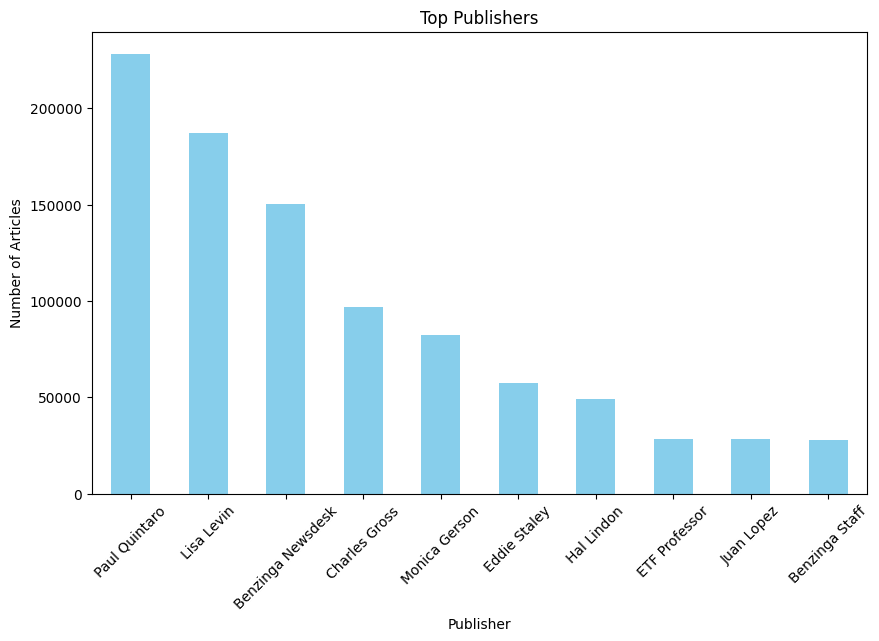

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

In [6]:
eda.count_articles_per_publisher(top_n=10)


# Publication Date Analysis:

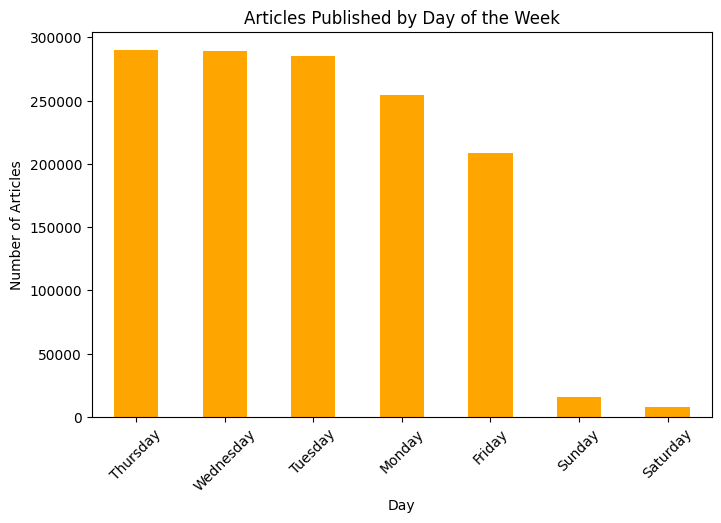

day_of_week
Thursday     289907
Wednesday    289049
Tuesday      285468
Monday       254842
Friday       208511
Sunday        16078
Saturday       7486
Name: count, dtype: int64

In [7]:
eda.analyze_publication_dates()


# Sentiment Analysis

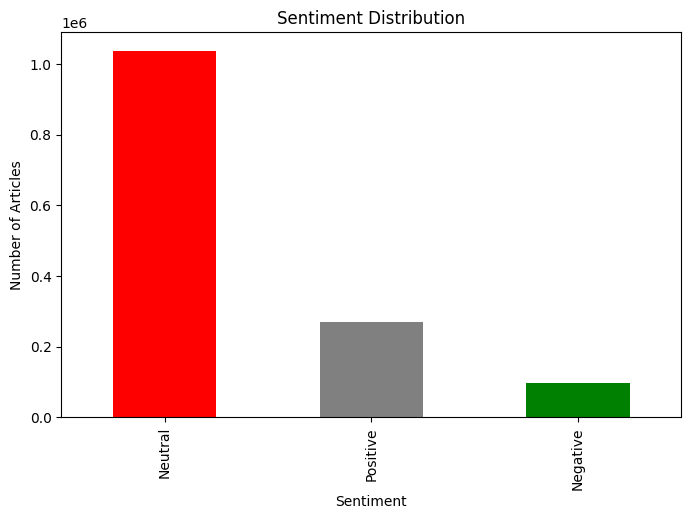

sentiment_category
Neutral     1038198
Positive     270218
Negative      96435
Name: count, dtype: int64

In [8]:
eda.perform_sentiment_analysis()


In [9]:
keywords = eda.extract_keywords(max_features=10)
print(keywords)


['earnings' 'eps' 'est' 'market' 'reports' 'sales' 'shares' 'stocks'
 'update' 'vs']


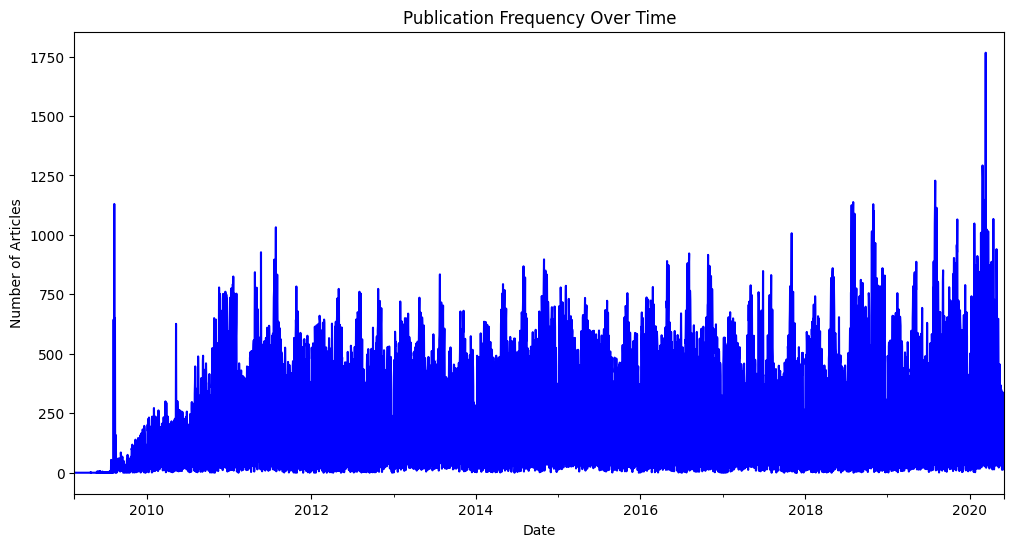

date
2009-02-14      1
2009-02-15      0
2009-02-16      0
2009-02-17      0
2009-02-18      0
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Length: 4128, dtype: int64

In [10]:
eda.analyze_publication_trends()


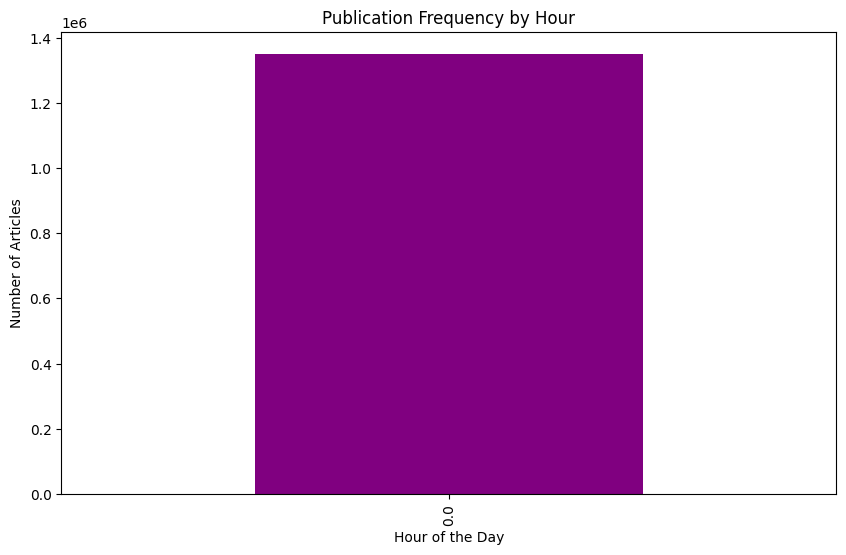

hour
0.0    1351341
Name: count, dtype: int64

In [14]:
eda.analyze_publishing_times()


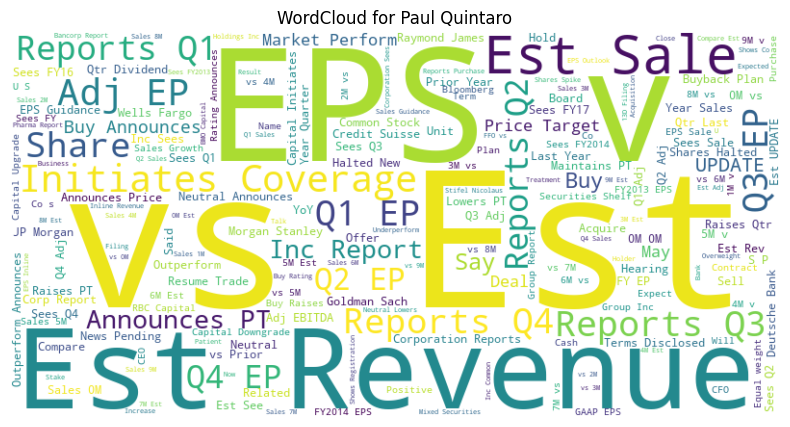

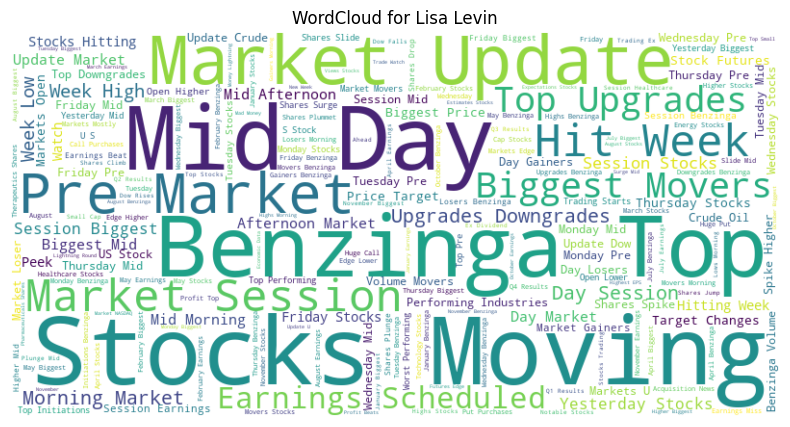

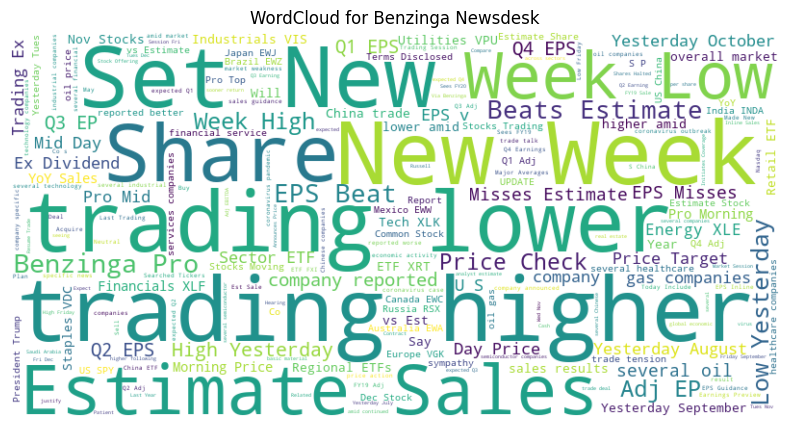

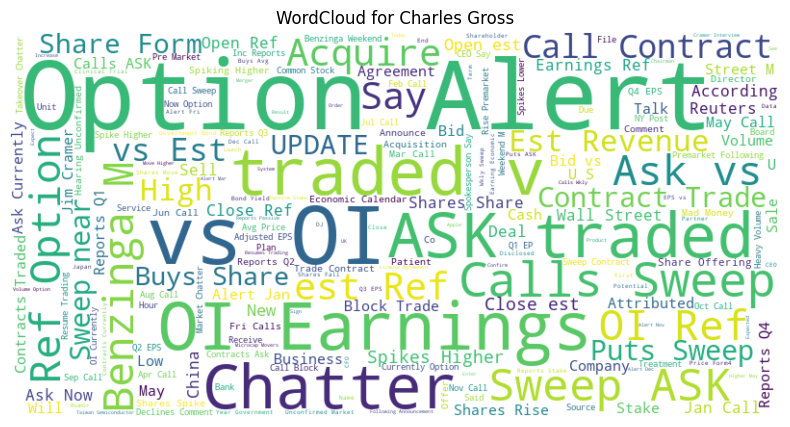

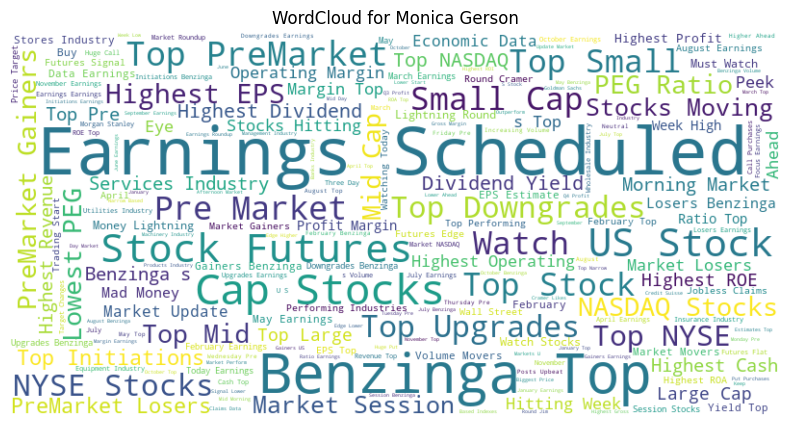

In [12]:
eda.generate_wordcloud_for_publishers(top_n=5)


In [13]:
domains = eda.extract_unique_domains()
print(domains)


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
